# Kaggle : titanic dataset
### EDA & ML prediction
- https://www.kaggle.com/competitions/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

### Data Dictionary

|Variable|Definition|Key|
|------------|-----------|-----------|
|survival|	Survival	|0 = No, 1 = Yes |
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	|
|Age	|Age in years	|
|sibsp	|# of siblings / spouses aboard the Titanic|	
|parch	|# of parents / children aboard the Titanic|	
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: title={'center': 'Pearson Correlation'}>

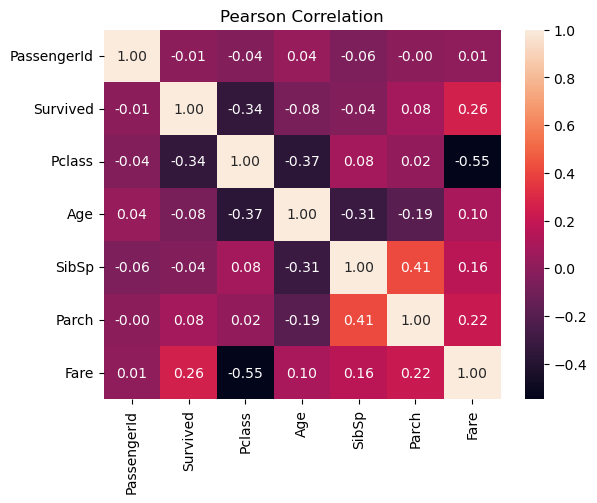

In [8]:
col = train.select_dtypes(include = ['int', 'float']).columns

plt.title('Pearson Correlation')
sns.heatmap(train[col].corr(), annot = True, fmt = '.2f')

<Axes: xlabel='Sex', ylabel='count'>

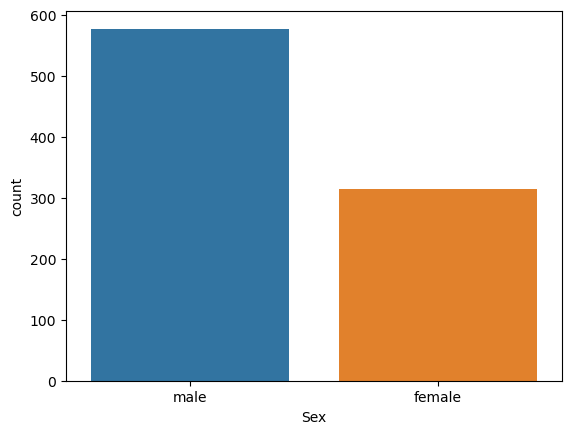

In [9]:
# 성별 countplot
sns.countplot(x = train['Sex'])

<Axes: xlabel='Age', ylabel='Count'>

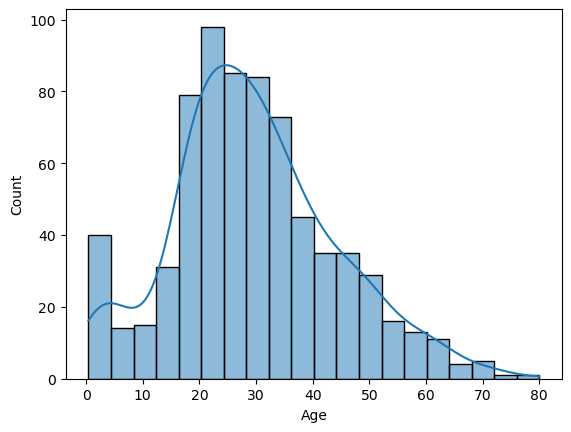

In [10]:
# 나이 histplot + kde : T
sns.histplot(train['Age'], kde = True)

<Axes: xlabel='Pclass', ylabel='count'>

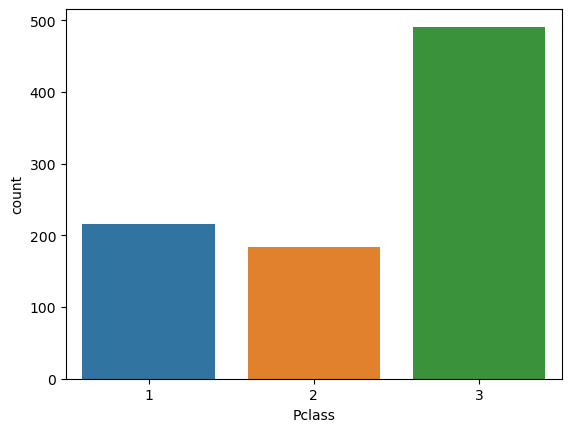

In [11]:
# Pclass (ticket grade) countplot
sns.countplot(x = train['Pclass'])

<Axes: xlabel='Embarked', ylabel='count'>

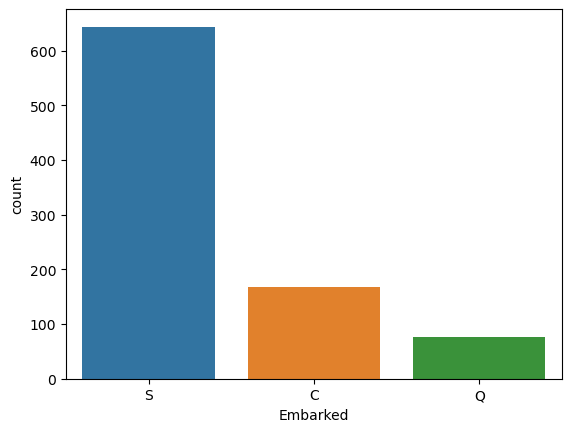

In [12]:
# Embarked (port of embarkation) countplot
sns.countplot(x = train['Embarked'])

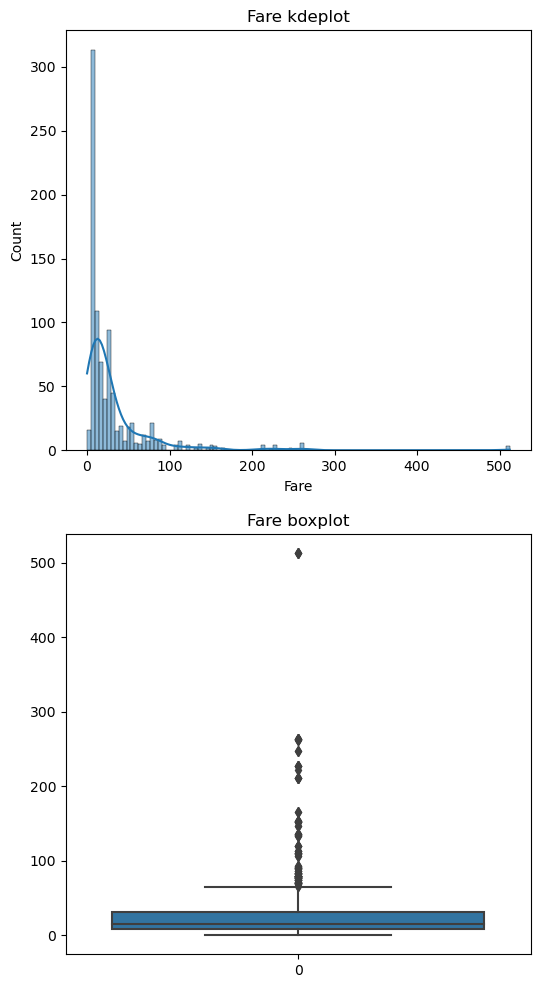

In [13]:
# Fare plot

plt.figure(figsize = (6, 12))

plt.subplot(2,1,1)
plt.title('Fare kdeplot')
sns.histplot(train['Fare'], kde = True)

plt.subplot(2,1,2)
plt.title('Fare boxplot')
sns.boxplot(train['Fare'])

plt.show()

### CDA 1. target : Fare

In [14]:
import scipy.stats as spst

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# 독립변수, 종속변수를 input으로 받는 kdeplot, 유의성검정 함수 생성

def get_test(ind_var, de_var):
    
    print(train[ind_var].corr(train[de_var]))
    
    plt.figure(figsize = (8, 8))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x = train[ind_var], y = train[de_var])

    plt.subplot(1,2,2)
    sns.boxplot(x = train[ind_var], y = train[de_var])
    
    plt.show()

0.18233283380286996


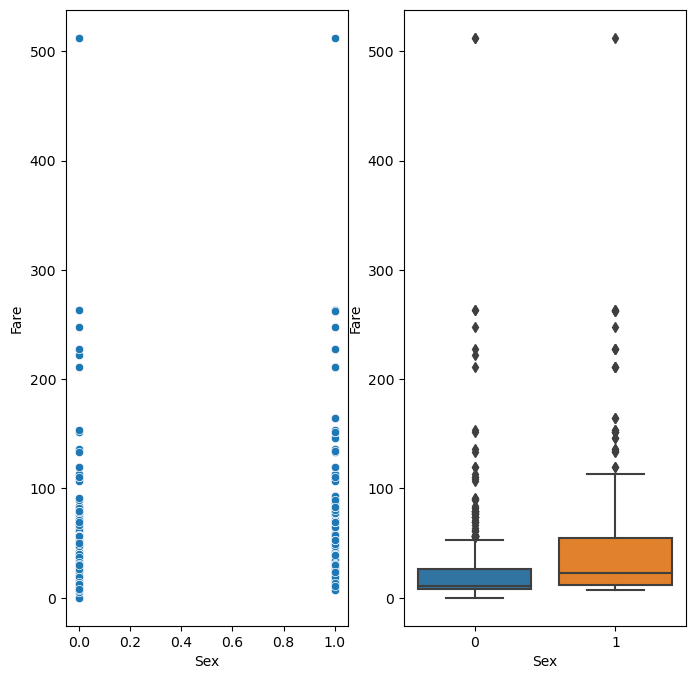

In [17]:
# 가설 1. 성별이 운임에 유의하다.

# 'Sex' 컬럼 값 mapping
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

get_test('Sex', 'Fare')

0.09606669176903887


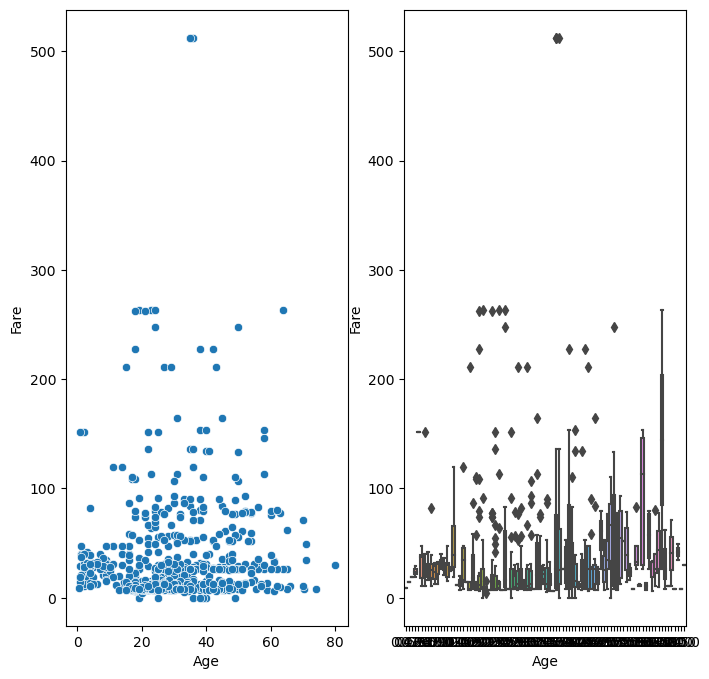

In [18]:
# 가설 2. 나이가 운임에 유의하다.

get_test('Age', 'Fare')

-0.5494996199439078


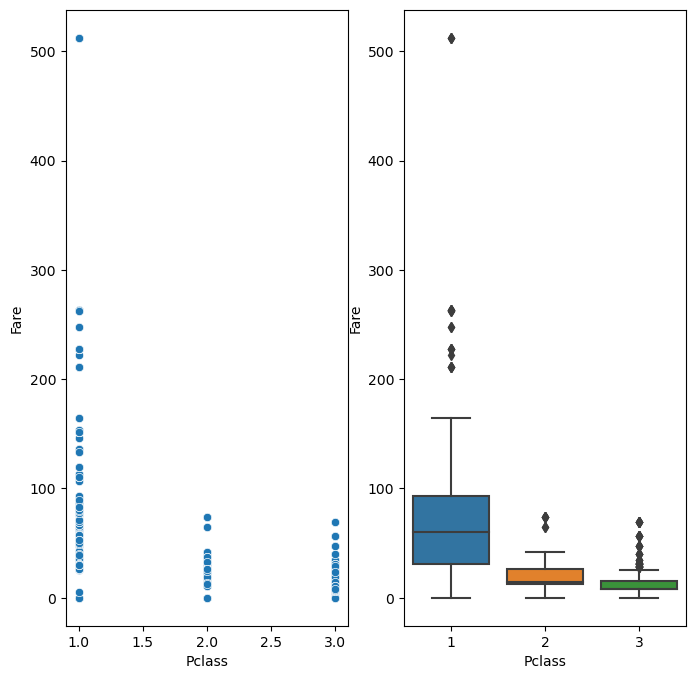

In [19]:
# 가설 3. 티켓등급(1 = 1st, 2 = 2nd, 3 = 3rd)이 운임에 유의하다.

get_test('Pclass', 'Fare')

0.06346234476922952


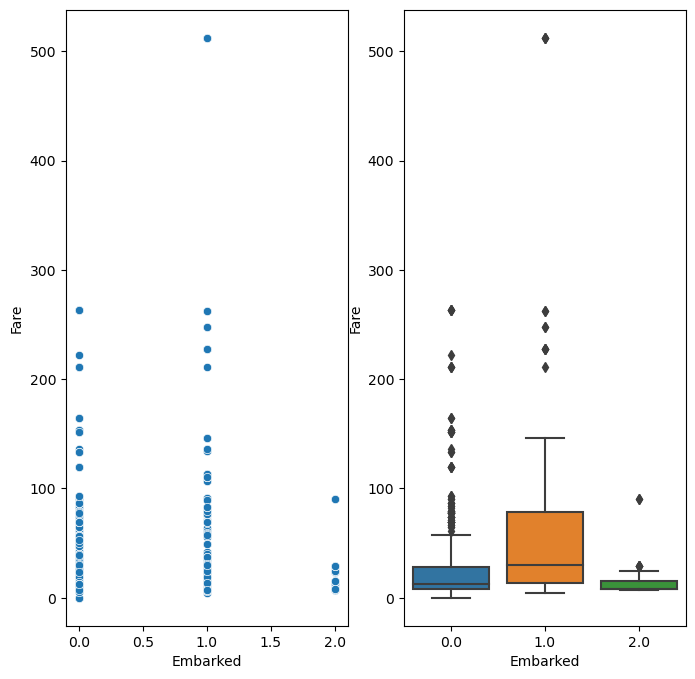

In [20]:
# 가설 4. 승선한 포트(C = Cherbourg, Q = Queenstown, S = Southampton)가 운임에 유의하다.

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

get_test('Embarked', 'Fare')

### CDA 2. target : Survived

0.5433513806577551


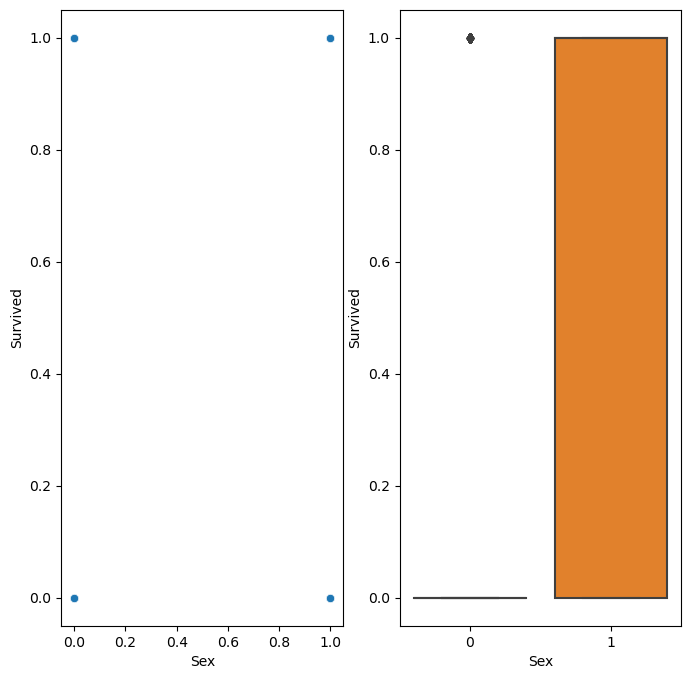

In [25]:
# 가설 1. 성별이 생존여부에 유의하다.

get_test('Sex', 'Survived')

-0.07722109457217764


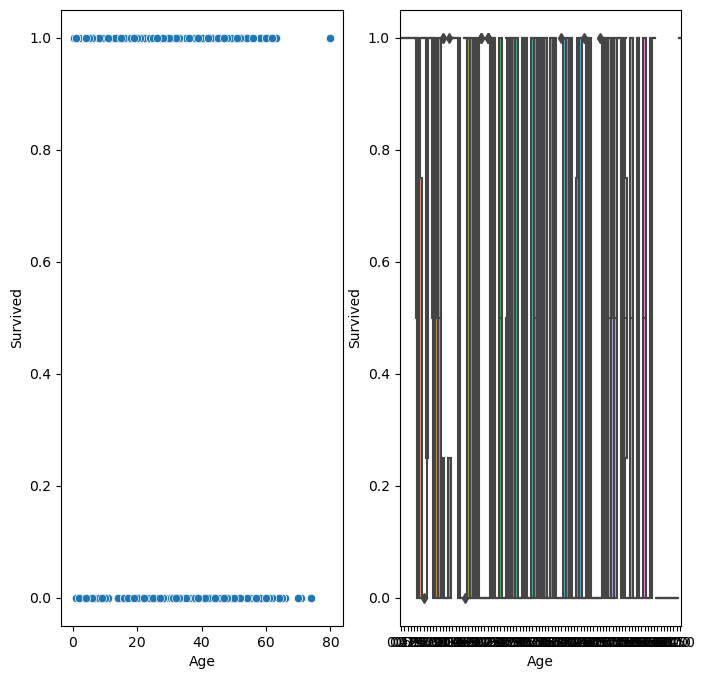

In [26]:
# 가설 2. 나이가 생존여부에 유의하다.

get_test('Age', 'Survived')

-0.3384810359610147


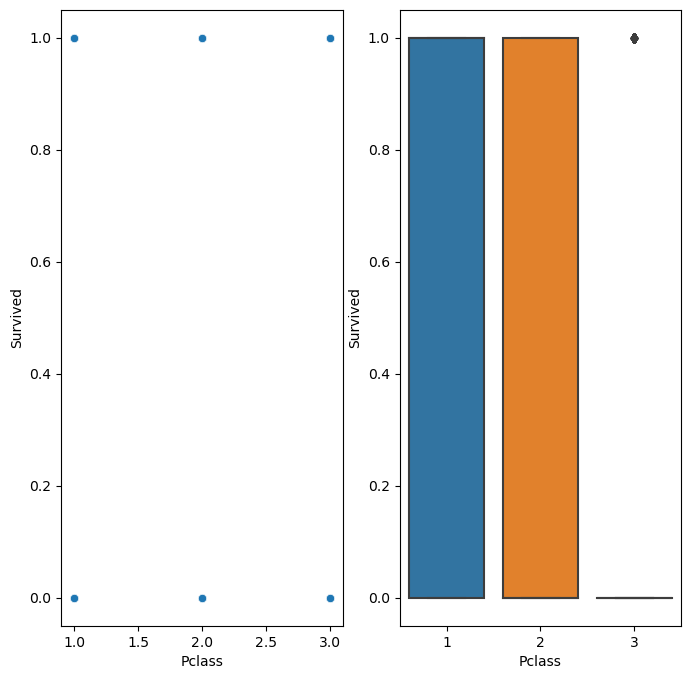

In [27]:
# 가설 3. 티켓등급(1 = 1st, 2 = 2nd, 3 = 3rd)이 생존여부에 유의하다.

get_test('Pclass', 'Survived')

0.10866867101787406


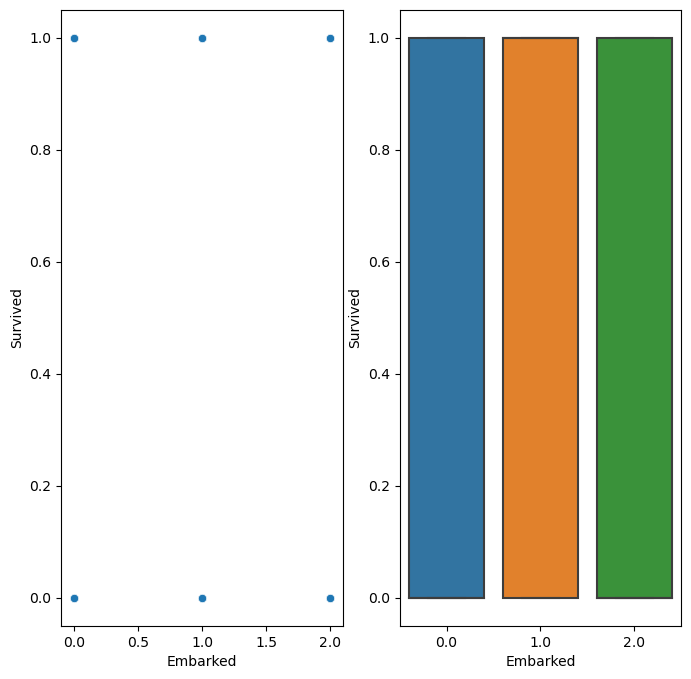

In [28]:
# 가설 4. 승선한 포트(C = Cherbourg, Q = Queenstown, S = Southampton)가 생존여부에 유의하다.

get_test('Embarked', 'Survived')

<Axes: xlabel='Embarked', ylabel='Survived'>

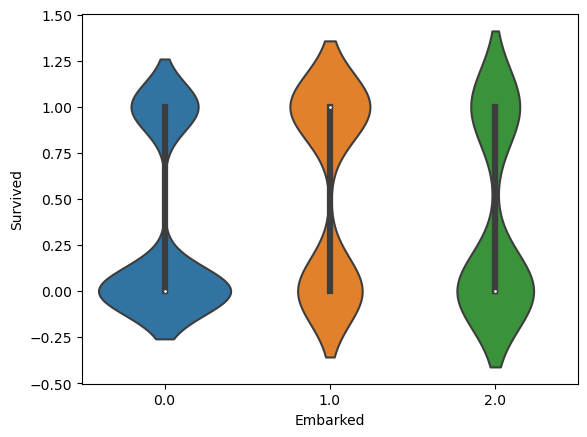

In [30]:
sns.violinplot(x='Embarked', y='Survived', data=train, ci=None)

### Feature Engineering
- model 정확도 높이기 위해
- train, test 둘 다 적용시켜야 함

In [32]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
train['Age'].isna().sum()

177

- 177개의 'Age' 결측치 존재
- 'Name'으로 추측하여 결측치 채우기

In [35]:
train['Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


- train['Name'] 은 Series형태이므로 .str 후 정규표현식으로 Mr. Mrs. 처럼 . 앞에 단어 찾기

In [40]:
# 정규표현식으로 Mr. Mrs. 등 호칭 추출

train['Initial'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['Initial'] = test['Name'].str.extract('([A-Za-z]+)\.')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,Mr


In [42]:
# crosstab으로 Initial 값 별 성별 확인

pd.crosstab(train['Initial'], train['Sex'])

Sex,0,1
Initial,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [46]:
# 'Mr', 'Miss', 'Mrs' 를 제외한 나머지 호칭 replace (남 or 여 모르겠는건 'Other')

train['Initial'] = train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'])

test['Initial'] = test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'])

train['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [53]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

<Axes: xlabel='Initial'>

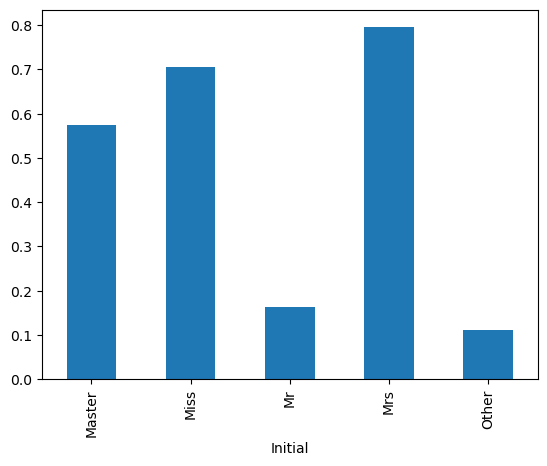

In [55]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [60]:
# train, test 셋 concat

df_all = pd.concat([train, test])

train.shape, test.shape, df_all.shape

((891, 13), (418, 12), (1309, 13))

In [87]:
# concat 한 df_all 데이터프레임의 'Initial' 컬럼의 평균 'Age' 값 확인

Init = df_all.groupby('Initial')['Age'].mean()

Init

Initial
Master     5.482642
Miss      21.834533
Mr        32.556397
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

In [88]:
Init.keys()[0]

'Master'

In [89]:
Init.values[0]

5.482641509433962

In [91]:
# 반복문으로 'Age'가 null이고 'Initial'이 각각 ['Master', 'Miss', 'Mr', 'Mrs', 'Other'] 인 데이터를
# 해당 'Initial' 의 평균 'Age' 로 채우기

for i in range(5):
    train.loc[(train['Age'].isna()) & (train['Initial'] == Init.keys()[i]),'Age'] = Init.values[i]
    test.loc[(test['Age'].isna()) & (test['Initial'] == Init.keys()[i]),'Age'] = Init.values[i]
    
train['Age'].isna().sum(), test['Age'].isna().sum()

(0, 0)

### ML prediction : 'Survived'